In [29]:
from langgraph.graph import StateGraph, START, END
from langchain_google_genai import ChatGoogleGenerativeAI
from typing import TypedDict
from dotenv import load_dotenv
import os

In [30]:
load_dotenv() # Load environment variables from .env file

True

In [31]:
api_key = os.getenv("GEMINI_API_KEY")

model = ChatGoogleGenerativeAI(
    model="gemini-2.5-flash",
    google_api_key=api_key  
)

In [32]:
# define state 

class BlogState(TypedDict):
    title: str
    outline: str
    content: str
    evaluation_score: str

In [33]:
def create_outline(state: BlogState) -> BlogState:
    
    # fetch title from state
    title = state["title"]

    # call model to create outline 

    prompt = f"Create a detailed outline for a blog post titled: '{title}'"

    outline = model.invoke(prompt).content

    # update state with outline
    state["outline"] = outline
    return state

In [34]:
def create_blog_content(state: BlogState) -> BlogState:
    
    # fetch title and outline from state
    title = state["title"]
    outline = state["outline"]

    # call model to create content 

    prompt = f"Write a detailed blog post titled: '{title}' based on the following outline:\n{outline}"

    content = model.invoke(prompt).content

    # update state with content
    state["content"] = content
    return state

In [35]:
def evaluate_blog(state: BlogState) -> BlogState:
    
    # fetch content from state
    content = state["content"]

    # call model to evaluate content quality

    prompt = f"Evaluate the quality of the following blog post content on a scale of 1 to 10:\n{content}"

    evaluation = model.invoke(prompt).content

     

    # update state with evaluation score
    state["evaluation_score"] = evaluation
    return state

<img src="prompt_chain.png">

In [36]:
blog_graph = StateGraph(BlogState)

# nodes

blog_graph.add_node("create_outline", create_outline)
blog_graph.add_node("create_blog_content", create_blog_content)
blog_graph.add_node("evaluate_blog", evaluate_blog)

# edges

blog_graph.add_edge(START, "create_outline")
blog_graph.add_edge("create_outline", "create_blog_content")
blog_graph.add_edge("create_blog_content", "evaluate_blog")
blog_graph.add_edge("evaluate_blog", END)

# compile graph

blog_workflow = blog_graph.compile()



In [37]:
# Define intial state
initial_state = {
    "title": "The Future of Artificial Intelligence in Everyday Life"  
}

In [38]:
# execute workflow

final_state = blog_workflow.invoke(initial_state)

In [41]:
print("Blog Title:", final_state["title"])

Blog Title: The Future of Artificial Intelligence in Everyday Life


In [42]:
print("Blog Outline:", final_state["outline"])

Blog Outline: Okay, here's a detailed outline for a blog post titled "The Future of Artificial Intelligence in Everyday Life." This outline aims for a comprehensive yet engaging exploration, suitable for a general audience interested in technology's impact.

---

## Blog Post Outline: The Future of Artificial Intelligence in Everyday Life

**Blog Post Title:** The Future of Artificial Intelligence in Everyday Life

**Target Audience:** Tech-curious individuals, general public, students, professionals interested in future trends.

**Goal:** To inform and excite readers about the tangible ways AI will integrate into and transform their daily lives, while also acknowledging key considerations.

---

### I. Introduction (Approx. 150-200 words)

*   **A. Hook:** Start with a relatable scenario – current AI (Siri, Netflix recommendations, smart thermostats) and how it's already subtly present.
    *   *Example:* "From asking Alexa about the weather to getting personalized movie recommendatio

In [43]:
print("Blog Content:", final_state["content"])

Blog Content: ## The Future of Artificial Intelligence in Everyday Life

From asking Alexa about the weather to getting personalized movie recommendations on Netflix, or having your smart thermostat learn your preferred temperature, Artificial Intelligence is no longer a futuristic concept. It's an invisible assistant, subtly woven into the fabric of our daily routines, making countless tasks a little easier, a little smarter.

But what we see today is merely the tip of the iceberg. The *real* transformation is yet to come, moving AI from reactive tools that respond to our commands to proactive, intuitive companions that anticipate our needs. This isn't science fiction; it's the imminent reality. This blog post will explore how AI is poised to profoundly integrate into various facets of our everyday lives – from our homes and health to work and leisure – shaping a more intelligent, personalized, and efficient future for all of us. Join us as we journey into the near future, examining t

In [44]:
print("Blog Evaluation Score:", final_state["evaluation_score"])

Blog Evaluation Score: ## Evaluation of "The Future of Artificial Intelligence in Everyday Life"

**Overall Quality Score: 9/10**

This is an exceptionally well-written and comprehensive blog post that effectively achieves its goal of exploring the near-future integration of AI into everyday life.

Here's a breakdown of its strengths and minor areas for improvement:

**Strengths:**

1.  **Engaging Introduction:** The post starts with relatable examples of current AI, immediately drawing the reader in and establishing the premise that AI is already here, but the *real* transformation is yet to come. The "tip of the iceberg" analogy is effective.
2.  **Clear Structure and Flow:** The blog post is logically organized into distinct, easy-to-follow sections (Smart Home, Healthcare, Transportation, Work, Societal Implications). Each section has a clear heading and cohesive paragraphs, making it easy for the reader to digest information.
3.  **Comprehensive Coverage:** It covers a broad spect

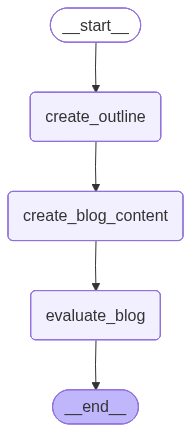

In [40]:
from IPython.display import Image
Image(blog_workflow.get_graph().draw_mermaid_png())